In [1]:
%cd /content/drive/MyDrive/NCTU-1091DeepLearning/HW3/dataset
!pip install -U torch torchvision
!pip install git+https://github.com/facebookresearch/fvcore.git
#!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo

/content/drive/MyDrive/NCTU-1091DeepLearning/HW3/dataset
Requirement already up-to-date: torch in /usr/local/lib/python3.6/dist-packages (1.7.0+cu101)
Requirement already up-to-date: torchvision in /usr/local/lib/python3.6/dist-packages (0.8.1+cu101)
  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-aq_h4bfb
  Running command git clone -q https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-aq_h4bfb
     |████████████████████████████████| 276kB 23.4MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.2-cp36-none-any.whl size=48336 sha256=702a9a14b430e7713d6b3c881b563f172e16b9666c9ad3a995f3aa544d809db6
  Stored in directory: /tmp/pip-ephem-wheel-cache-6pr4q3vc/wheels/48/53/79/3c6485543a4455a0006f5db590ab9957622b6227011941de06
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44619 sha256=3e8ab9ffff132277a9db5bd660a68c8c0c5ac069cc027513571abfe0a8df76d0
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd

In [1]:
%cd /content/drive/MyDrive/NCTU-1091DeepLearning/HW3/dataset/detectron2_repo

/content/drive/MyDrive/NCTU-1091DeepLearning/HW3/dataset/detectron2_repo


In [2]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("tiny_voc", {}, "/content/drive/MyDrive/NCTU-1091DeepLearning/HW3/dataset/pascal_train.json", "/content/drive/MyDrive/NCTU-1091DeepLearning/HW3/dataset/train_images")

In [3]:
from detectron2.data import DatasetCatalog, MetadataCatalog
tiny_voc_metadata = MetadataCatalog.get("tiny_voc")
tiny_voc_metadata

Metadata(evaluator_type='coco', image_root='/content/drive/MyDrive/NCTU-1091DeepLearning/HW3/dataset/train_images', json_file='/content/drive/MyDrive/NCTU-1091DeepLearning/HW3/dataset/pascal_train.json', name='tiny_voc')

In [6]:
tiny_voc_metadata.thing_classes

['aeroplane',
 'bicycle',
 'bird',
 'boat',
 'bottle',
 'bus',
 'car',
 'cat',
 'chair',
 'cow',
 'diningtable',
 'dog',
 'horse',
 'motorbike',
 'person',
 'pottedplant',
 'sheep',
 'sofa',
 'train',
 'tvmonitor']

In [5]:
dataset_dicts = DatasetCatalog.get("tiny_voc")
#dataset_dicts

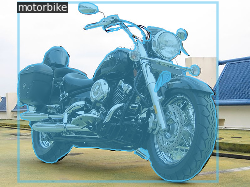

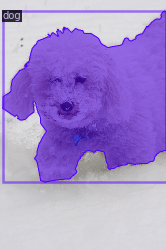

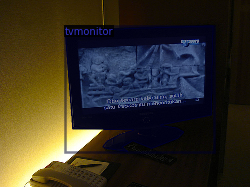

In [7]:
import random
import cv2
from google.colab.patches import cv2_imshow
from detectron2.utils.visualizer import Visualizer

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=tiny_voc_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [12]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

cfg = get_cfg()
cfg.merge_from_file(
    "./configs/COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml"
)
cfg.DATASETS.TRAIN = ("tiny_voc",)
cfg.DATASETS.TEST = ()  # no metrics implemented for this dataset
cfg.DATALOADER.NUM_WORKERS = 2
#cfg.MODEL.WEIGHTS = "detectron2://ImageNetPretrained/FAIR/X-101-32x8d.pkl"  # initialize from model zoo
cfg.MODEL.WEIGHTS = ""
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.0003
cfg.SOLVER.MAX_ITER = (
    10000
)  # 300 iterations seems good enough, but you can certainly train longer
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = (
    128
)  # faster, and good enough for this toy dataset
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 20  # 3 classes (data, fig, hazelnut)

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=True)
trainer.train()

[12/02 14:38:05 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

/content/drive/MyDrive/NCTU-1091DeepLearning/HW3/dataset/detectron2_repo/detectron2/structures/masks.py:345: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  item = item.nonzero().squeeze(1).cpu().numpy().tolist()
/content/drive/MyDrive/NCTU-1091DeepLearning/HW3/dataset/detectron2_repo/detectron2/structures/masks.py:345: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  item = item.nonzero().squeeze(1).cpu().numpy().tolist()
/content/drive/MyDrive/NCTU-1091DeepLearning/HW3/dataset/detectron2_repo/detectron2/modeling/roi_heads/fast_rcnn.py:217: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the f

[12/02 14:40:55 d2.utils.events]:  eta: 4:36:50  iter: 5019  total_loss: 0.963  loss_cls: 0.1878  loss_box_reg: 0.4434  loss_mask: 0.2921  loss_rpn_cls: 0.01152  loss_rpn_loc: 0.01434  time: 3.3421  data_time: 0.7473  lr: 0.0003  max_mem: 5799M
[12/02 14:42:06 d2.utils.events]:  eta: 4:48:30  iter: 5039  total_loss: 1.089  loss_cls: 0.1698  loss_box_reg: 0.499  loss_mask: 0.3371  loss_rpn_cls: 0.01326  loss_rpn_loc: 0.02498  time: 3.4017  data_time: 0.0073  lr: 0.0003  max_mem: 6279M
[12/02 14:43:16 d2.utils.events]:  eta: 4:47:48  iter: 5059  total_loss: 0.9854  loss_cls: 0.2002  loss_box_reg: 0.4589  loss_mask: 0.3321  loss_rpn_cls: 0.01702  loss_rpn_loc: 0.02335  time: 3.4393  data_time: 0.0071  lr: 0.0003  max_mem: 6279M
[12/02 14:44:27 d2.utils.events]:  eta: 4:49:15  iter: 5079  total_loss: 1.191  loss_cls: 0.234  loss_box_reg: 0.5103  loss_mask: 0.3625  loss_rpn_cls: 0.01822  loss_rpn_loc: 0.03231  time: 3.4729  data_time: 0.0065  lr: 0.0003  max_mem: 6279M
[12/02 14:45:37 d2.ut

In [19]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os
testcfg = get_cfg()
testcfg.merge_from_file("./configs/COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml")
testcfg.DATASETS.TRAIN = ("tiny_voc",)
testcfg.DATASETS.TEST = ("tiny_voc")
testcfg.DATALOADER.NUM_WORKERS = 2
testcfg.SOLVER.IMS_PER_BATCH = 2
testcfg.SOLVER.BASE_LR = 0.001
testcfg.SOLVER.MAX_ITER = 500
testcfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset
testcfg.MODEL.ROI_HEADS.NUM_CLASSES = 20  # only has one class (ballon)
testcfg.MODEL.WEIGHTS = os.path.join(testcfg.OUTPUT_DIR, "model_final.pth")
testcfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.4


In [20]:
from detectron2.engine import DefaultPredictor
predictor = DefaultPredictor(testcfg)

In [11]:
from itertools import groupby
from pycocotools.coco import COCO
from pycocotools import mask as maskutil
from detectron2.utils.visualizer import ColorMode

In [12]:
def binary_mask_to_rle(binary_mask):
    rle = {'counts': [], 'size': list(binary_mask.shape)}
    counts = rle.get('counts')
    for i, (value, elements) in enumerate(groupby(binary_mask.ravel(order='F'))):
        if i == 0 and value == 1:
            counts.append(0)
        counts.append(len(list(elements)))
    compressed_rle = maskutil.frPyObjects(rle, rle.get('size')[0], rle.get('size')[1])
    compressed_rle['counts'] = str(compressed_rle['counts'], encoding='utf-8')
    return compressed_rle

In [18]:

#imgid = coco_test.imgs.keys()
import random
import cv2
from google.colab.patches import cv2_imshow
from detectron2.utils.visualizer import Visualizer
coco_test = COCO("/content/drive/MyDrive/NCTU-1091DeepLearning/HW3/dataset/test.json")
counter = 0
for imgid in coco_test.imgs:
  image = cv2.imread("/content/drive/MyDrive/NCTU-1091DeepLearning/HW3/dataset/test_images/" + coco_test.loadImgs(ids=imgid)[0]['file_name'])[:,:,::-1] # load image
  outputs = predictor(image)
  v = Visualizer(image,
                      metadata=tiny_voc_metadata,
                      scale=1.2, 
                      instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
          )
  v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  cv2_imshow(v.get_image()[:,:,::-1])
  if counter == 20:
    break
  counter +=1
#print(outputs)

Output hidden; open in https://colab.research.google.com to view.

In [22]:
coco_test = COCO("/content/drive/MyDrive/NCTU-1091DeepLearning/HW3/dataset/test.json")

coco_output = []
import json

for imgid in coco_test.imgs:
    image = cv2.imread("/content/drive/MyDrive/NCTU-1091DeepLearning/HW3/dataset/test_images/" + coco_test.loadImgs(ids=imgid)[0]['file_name'])[:,:,::-1] # load image
    outputs = predictor(image)
    for i_instance in range(len(outputs["instances"].scores)):
        pred = {}
        pred['image_id'] = imgid
        pred['category_id'] = int(outputs["instances"].pred_classes[i_instance] + 1)
        binary_mask = outputs["instances"].pred_masks[i_instance].to("cpu").numpy()

        pred['segmentation'] = binary_mask_to_rle(binary_mask)
        pred['score'] = float(outputs["instances"].scores[i_instance])
        coco_output.append(pred)
with open('/content/drive/MyDrive/NCTU-1091DeepLearning/HW3/dataset/309505013.json', "w") as f:
    json.dump(coco_output, f)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
